In [1]:
from py_functions import *

# Luminosity functions

- Compute the LFs of the requested line, size and redshift
- Get the variance for the requested line, size and redshift
- Copmute the covariance matrix between the different luminosity bins

**ATTENTION: selecting a field size higher than 1 sq.deg takes a bit more time (~ 10 mins) to get the result because of the big amount of data**

In [3]:
line = 'CO' #possible option: CO, CII, CI | for CO you need to select a rotational transition J=1,2,...,8 | for [CI] J=1 or J=2
J = 2
field_size = 0.5 # select the size of the simulated field in deg^2 (maximum = 1 deg^2)
tile = 0 # ID of the sub-field used to construct the LF - if variance = True the value of this parameter doesn't matter
z1, z2 = 2, 2.5 # redshift slice
Lbins, min_logLbin_value, max_logLbin_value = 28, 5, 12 # number of luminosity bins - minimum value in log scale - maximum value in log scale
SIDES_cats_path = '/data/SIDES/PYSIDES_UCHUU_OUTPUTS/vpeak/' # path where the SIDES catalogs are stored

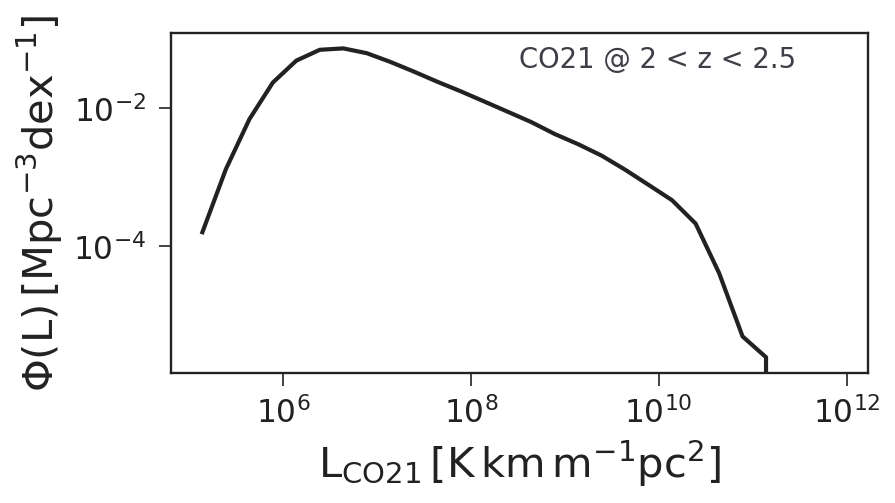

In [4]:
#example of plotting the LF of the requested: line, rotational transition, redshift slice, and survey size
Ls, phi, mean, median, std, p5, p16, p84, p95, rPearson = LF_computation(SIDES_cats_path, line, J, field_size, z1, z2, Lbins, min_logLbin_value, max_logLbin_value, tile)

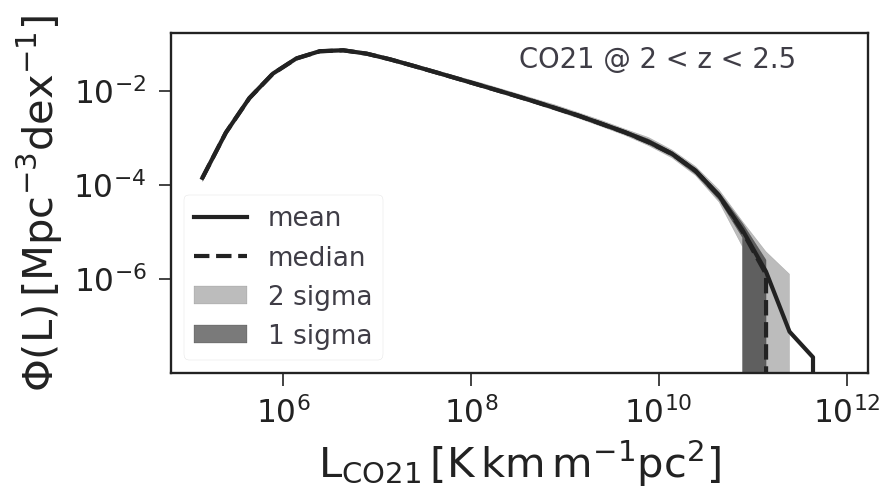

In [5]:
#example of plotting the LF and variance of the requested: line, rotational transition, redshift slice, and survey size
Ls, phi, mean, median, std, p5, p16, p84, p95, rPearson = LF_computation(SIDES_cats_path, line, J, field_size, z1, z2, Lbins, min_logLbin_value, max_logLbin_value, tile, variance = True)

Text(0, 0.5, 'Luminosity bins')

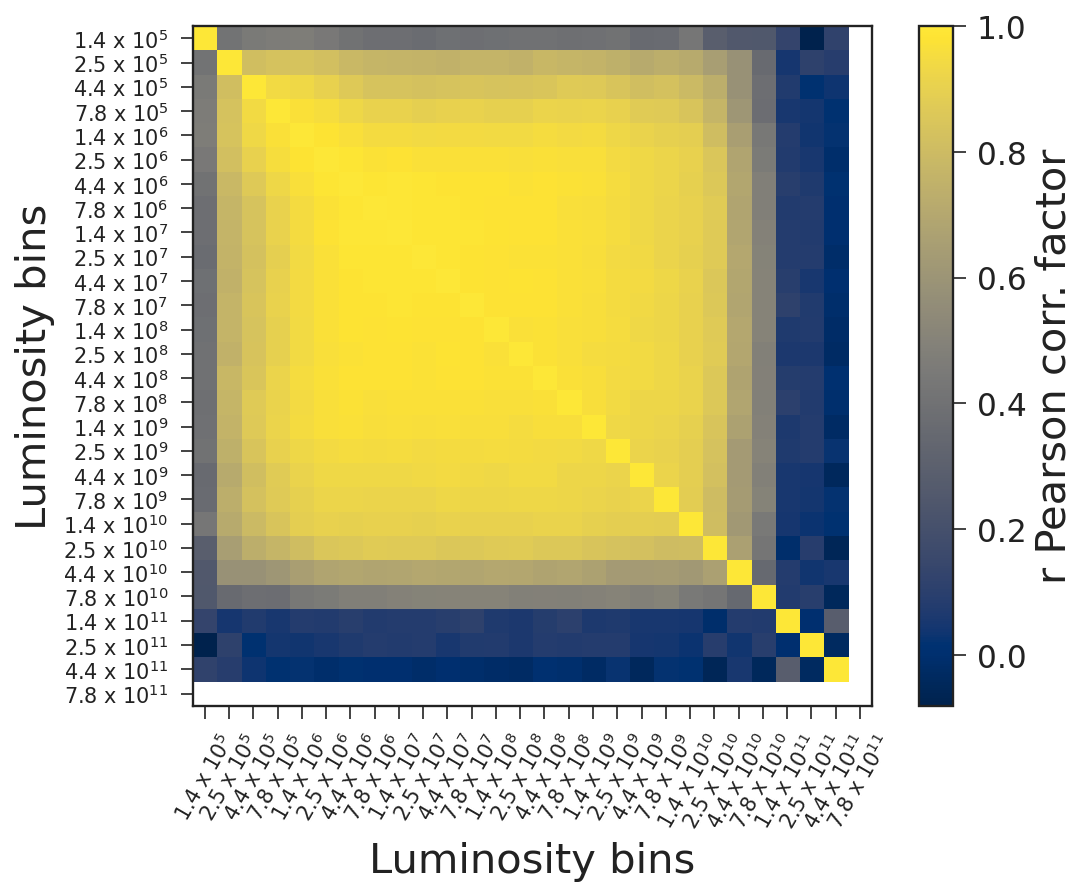

In [6]:
#example of plotting the correlation matrix of the above plotted LFs
Ls, phi, mean, median, std, p5, p16, p84, p95, rPearson = LF_computation(SIDES_cats_path, line, J, field_size, z1, z2, Lbins, min_logLbin_value, max_logLbin_value, tile, variance = True, plot = False)

plt.figure(figsize = (8,6), dpi = 150)

plt.imshow(rPearson, cmap='cividis')
s = Ls.shape[0]
xlabels = [r'{} x $\rm 10^{}$'.format(np.round(10**(np.log10(Ls[i]) - int(np.log10(Ls[i]))), 1), '{'+str(int(np.log10(Ls[i])))+'}') for i in range(s)]
ylabels = [r'{} x $\rm 10^{}$'.format(np.round(10**(np.log10(Ls[i]) - int(np.log10(Ls[i]))), 1), '{'+str(int(np.log10(Ls[i])))+'}') for i in range(s)]
plt.xticks(ticks = [i for i in range(s)], labels = xlabels, rotation = 60, fontsize = 10)
plt.yticks(ticks = [i for i in range(s)], labels = ylabels, fontsize = 10)

plt.colorbar(label = 'r Pearson corr. factor')
plt.xlabel('Luminosity bins');plt.ylabel('Luminosity bins')

# Molecular gas mass density

- Computes $\rho_{mol}$ for the given redshift (z) and size (Ω)
- Computes the $\rho_{mol}$ field-to-field variance

In [7]:
J = 2 # CO rotational transition
z1, z2 = 0.5, 0.6 # redshift slice
field_size = 0.5 # survey size

In [8]:
# example of computing the molecular gas density and variance for the requested: CO transition, redshift, and sruvey size
rho_mol, mean_rho_mol, median_rho_mol, std_rho_mol, p5_rho_mol, p16_rho_mol, p84_rho_mol, p95_rho_mol = rho_mol_computation(SIDES_cats_path, J, z1, z2, field_size)

In [9]:
print(rho_mol, mean_rho_mol, median_rho_mol, std_rho_mol, p5_rho_mol, p16_rho_mol, p84_rho_mol, p95_rho_mol)

0 50966598.0861393 48990143.90904827 12460087.359286964 31799464.09075396 39419867.57030846 64654387.325489014 73051719.7797331


If you want to get the field-to-field variance of $\rho_{\rm mol}$ as a function of survey size (up to 1 deg$^2$)

Estimated time to run: ~ 30 mins for 5 different sizes

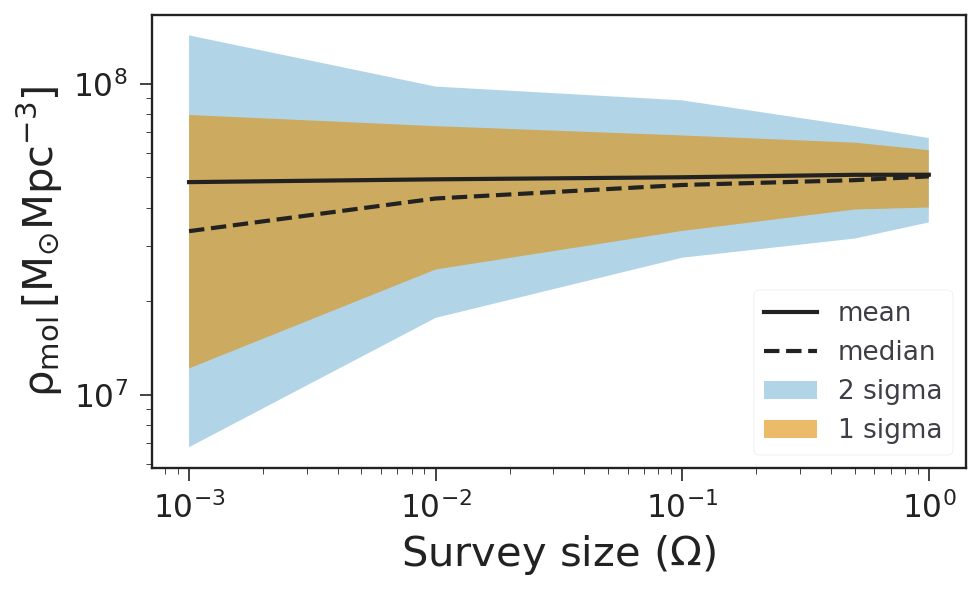

In [10]:
sizes_grid = np.array([0.001, 0.01, 0.1, 0.5, 1])
rho_mol, mean_rho_mol, median_rho_mol, std_rho_mol, p5_rho_mol, p16_rho_mol, p84_rho_mol, p95_rho_mol = [np.empty(sizes_grid.shape[0]) for _ in range(8)]

for i,field_size in enumerate(sizes_grid):
    rho_mol[i], mean_rho_mol[i], median_rho_mol[i], std_rho_mol[i], p5_rho_mol[i], p16_rho_mol[i], p84_rho_mol[i], p95_rho_mol[i] = rho_mol_computation(SIDES_cats_path, J, z1, z2, field_size)

plt.figure(figsize = (7,4), dpi = 150)

plt.loglog(sizes_grid, mean_rho_mol, c = 'k', lw = 2, label = 'mean')
plt.loglog(sizes_grid, median_rho_mol, c = 'k', ls = '--', lw = 2, label = 'median')
plt.fill_between(sizes_grid, p5_rho_mol, p95_rho_mol, alpha = 0.3, label = '2 sigma')
plt.fill_between(sizes_grid, p16_rho_mol, p84_rho_mol, alpha = 0.6, label = '1 sigma')

plt.xlabel(r'Survey size ($\Omega$)')
plt.ylabel(r'$\rm \rho_{mol} \, [M_{\odot} Mpc^{-3}]$')
plt.legend(loc = 4)

In [12]:
print(rho_mol, '\n', mean_rho_mol, '\n', median_rho_mol, '\n', std_rho_mol, '\n', p5_rho_mol, '\n', p16_rho_mol, '\n', p84_rho_mol, '\n', p95_rho_mol)

[0. 0. 0. 0. 0.] 
 [48281868.62455563 49289715.52218031 50046450.02370725 50966598.0861393
 50991666.20025773] [33594443.83890893 42775531.37625541 47269948.97362325 48990143.90904827
 50372798.87588853] [45455454.68177257 26540526.89109623 18158296.97334484 12460087.35928696
 10173276.69925391] [ 6796193.38755406 17686594.17811256 27600764.87958939 31799464.09075396
 35838004.68414556] [12168970.89310214 25297920.91410903 33649720.84851905 39419867.57030846
 40017922.04543684] [79336494.80601865 73036274.80046277 68185310.97371694 64654387.32548901
 61146572.68009091] [1.42927986e+08 9.78887954e+07 8.84034631e+07 7.30517198e+07
 6.69050904e+07]
